**Dataset Link** :- https://github.com/ejgao/Time-Series-Datasets/blob/master/Electric_Production.csv

**Problem Statement:**

Given a time series dataset of monthly electric production in the United States from 1985 to 2018, build a machine learning model to forecast future electric production.

**Objective:**

The objective of this project is to develop a model that can accurately predict future electric production based on historical data. This model can be used by policymakers, energy companies, and other stakeholders to make informed decisions about energy production and consumption.

**Data:**

The dataset contains monthly electric production data from January 1985 to December 2018. The data is provided in a CSV file and includes the following columns:

* Date: The date of the observation.
* Production: The amount of electricity produced in the United States in millions of megawatt hours.

**Methods:**

A variety of time series models can be used to solve this problem, such as:

* Holt winters
* Arima
* Sarima

The choice of model will depend on the specific characteristics of the data and the desired accuracy of the predictions.

**Evaluation:**

The performance of the model will be evaluated using a variety of metrics, such as:

* Root mean squared error


The model with the best performance will be selected for future predictions.

which is in this case **ARIMA** model

In [ ]:
pip install pymannkendall

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymannkendall as mk
from scipy.stats import kruskal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

### **About Dataset**
- Electric energy production
- Data range from 1/1/1985 to 1/1/2018
32 years total data
- 2 features are present 1 is Date column another is production


In [ ]:
df = pd.read_csv('electric.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [ ]:
df.shape

(397, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
df["DATE"]=pd.to_datetime(df["DATE"])
df.dtypes
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [ ]:
df.rename(columns={'IPG2211A2N': 'production'}, inplace=True)
df.head()

,DATE,production
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [ ]:
df["Days"]=df.DATE.dt.day
df["Month"]=df.DATE.dt.month
df["Year"]=df.DATE.dt.year
df["Day of week"]=df.DATE.dt.dayofweek
df.head()

,DATE,production,Days,Month,Year,Day of week
0,1985-01-01,72.5052,1,1,1985,1
1,1985-02-01,70.6720,1,2,1985,4
2,1985-03-01,62.4502,1,3,1985,4
3,1985-04-01,57.4714,1,4,1985,0
4,1985-05-01,55.3151,1,5,1985,2


<Axes: xlabel='Year'>

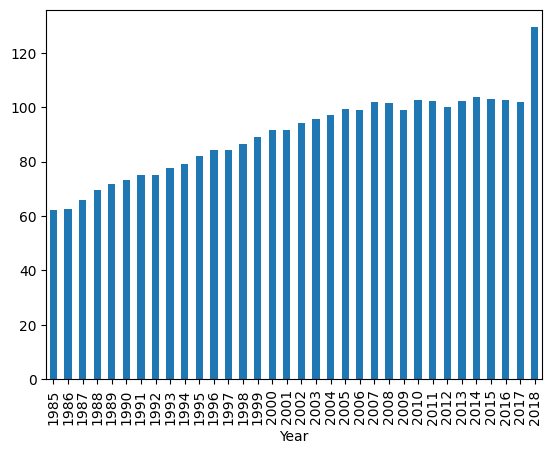

In [ ]:
df.groupby("Year")["production"].mean().plot(kind="bar")

<Axes: xlabel='Month'>

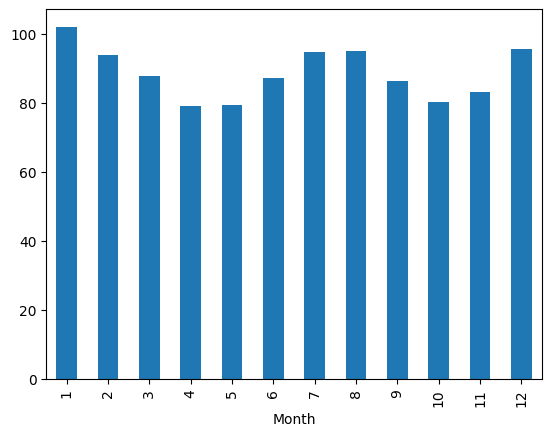

In [ ]:
df.groupby("Month")["production"].mean().plot(kind="bar")

<Axes: xlabel='Day of week'>

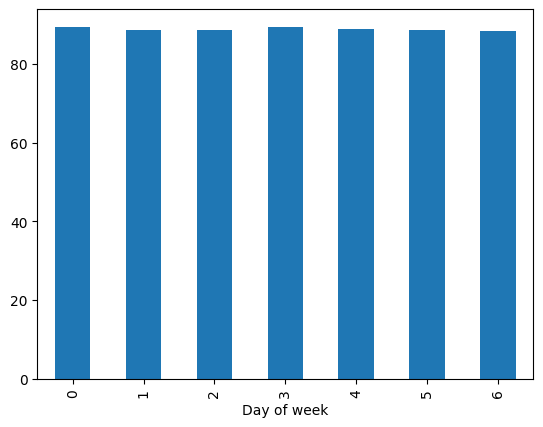

In [ ]:
df.groupby("Day of week")["production"].mean().plot(kind="bar")

In [ ]:
df.set_index('DATE', inplace=True)

In [ ]:
df = df[['production']]

In [ ]:
df.describe()

,production
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [ ]:
df.isnull().sum()

production    0
dtype: int64

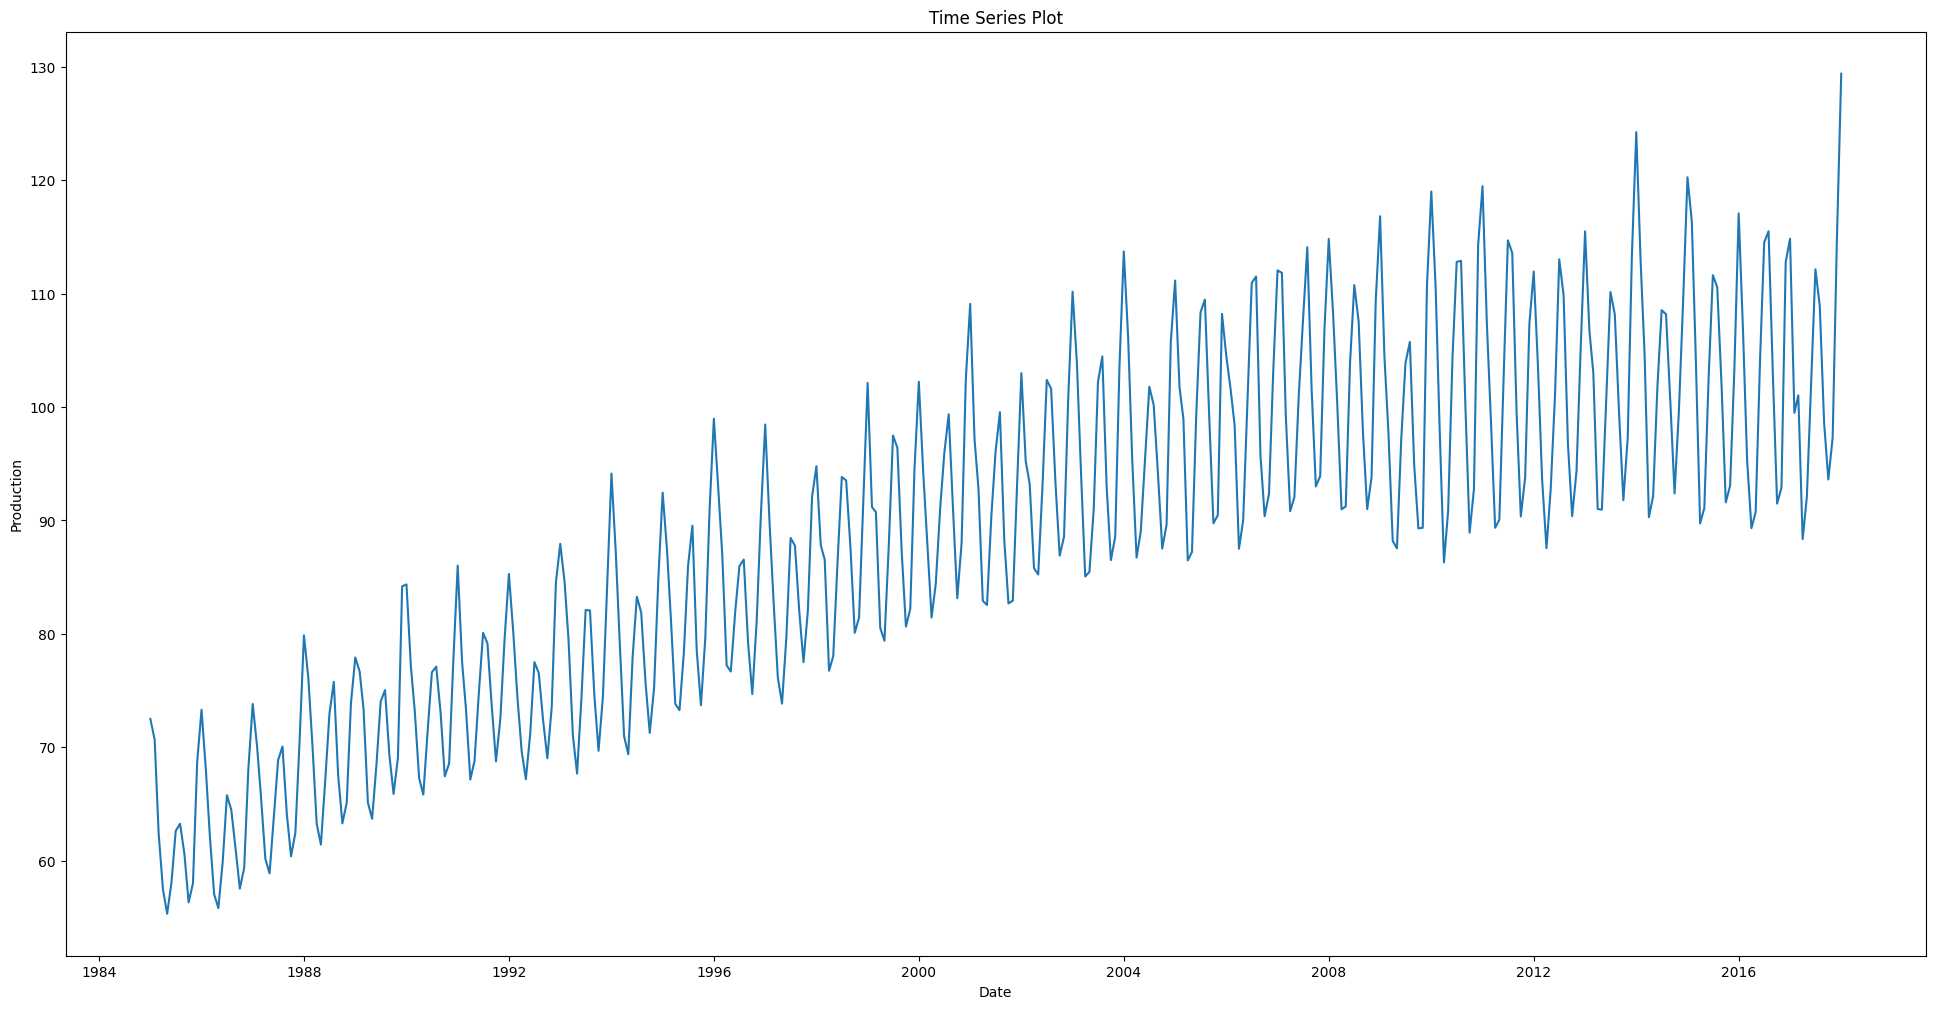

In [ ]:
plt.figure(figsize=(24, 12))
plt.plot(df.index, df)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

# Test for Trend

# H0: There is no monotonic trend in the series

In [ ]:
trend_result = mk.original_test(df['production'])
print("Mann-Kendall Test for Trend:")
print("Trend: ", "Increasing" if trend_result.slope > 0 else "Decreasing")
print("p-value: ", trend_result.p)
if trend_result.p < 0.05:
    print("The trend is statistically significant.")
else:
    print("The trend is not statistically significant.")
print(trend_result)

Mann-Kendall Test for Trend:
Trend:  Increasing
p-value:  0.0
The trend is statistically significant.
Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=19.125339232804578, Tau=0.6427499173091112, s=50524.0, var_s=6978466.0, slope=0.11486610139860137, intercept=67.03601192307693)


Since p-value < 0.05, reject H0 i.e. There is presence of trend

# Test for seasonality

# H0: There is no seasonal pattern in the series.

In [ ]:
seasonality_result = kruskal(df.index.month, df['production'])
print("\nKruskal-Wallis Test for Seasonality:")
print("p-value: ", seasonality_result.pvalue)
if seasonality_result.pvalue < 0.05:
    print("The data exhibits seasonality.")
else:
    print("The data does not exhibit seasonality.")


Kruskal-Wallis Test for Seasonality:
p-value:  1.7914484458143447e-131
The data exhibits seasonality.


Since p-value < 0.05, reject H0 i.e. Seasonality is present

# Seasonal Decomposition

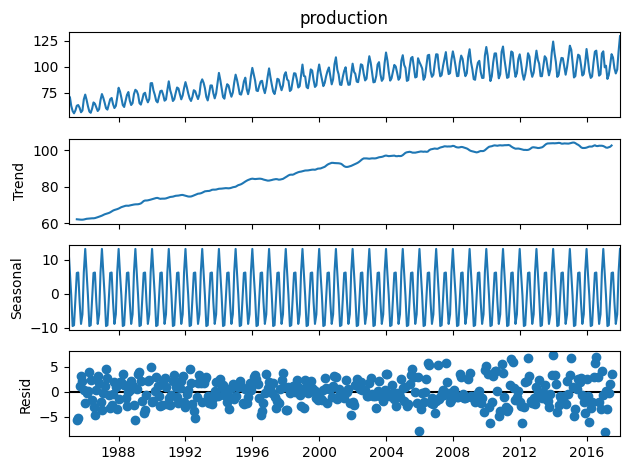

In [ ]:
decomposition = seasonal_decompose(df['production'], model='additive', period=12)
decomposition.plot()
plt.show()

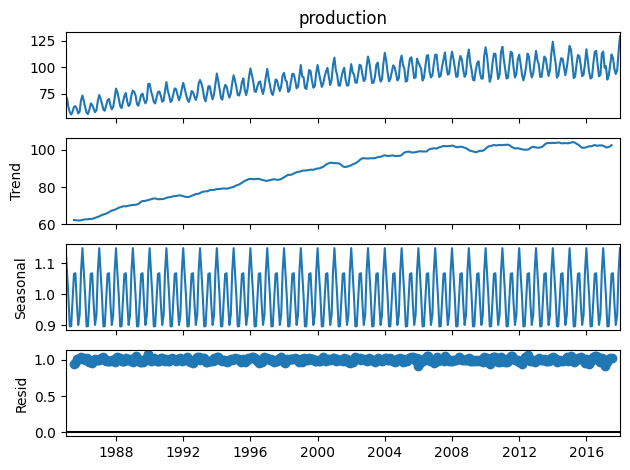

In [ ]:
decomposition = seasonal_decompose(df['production'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

Since the residuals for additive are around white noise. Additive model was ideal

# Holt Winters

In [ ]:
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
model = ExponentialSmoothing(train_data['production'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
predictions = model_fit.forecast(steps=len(test_data))

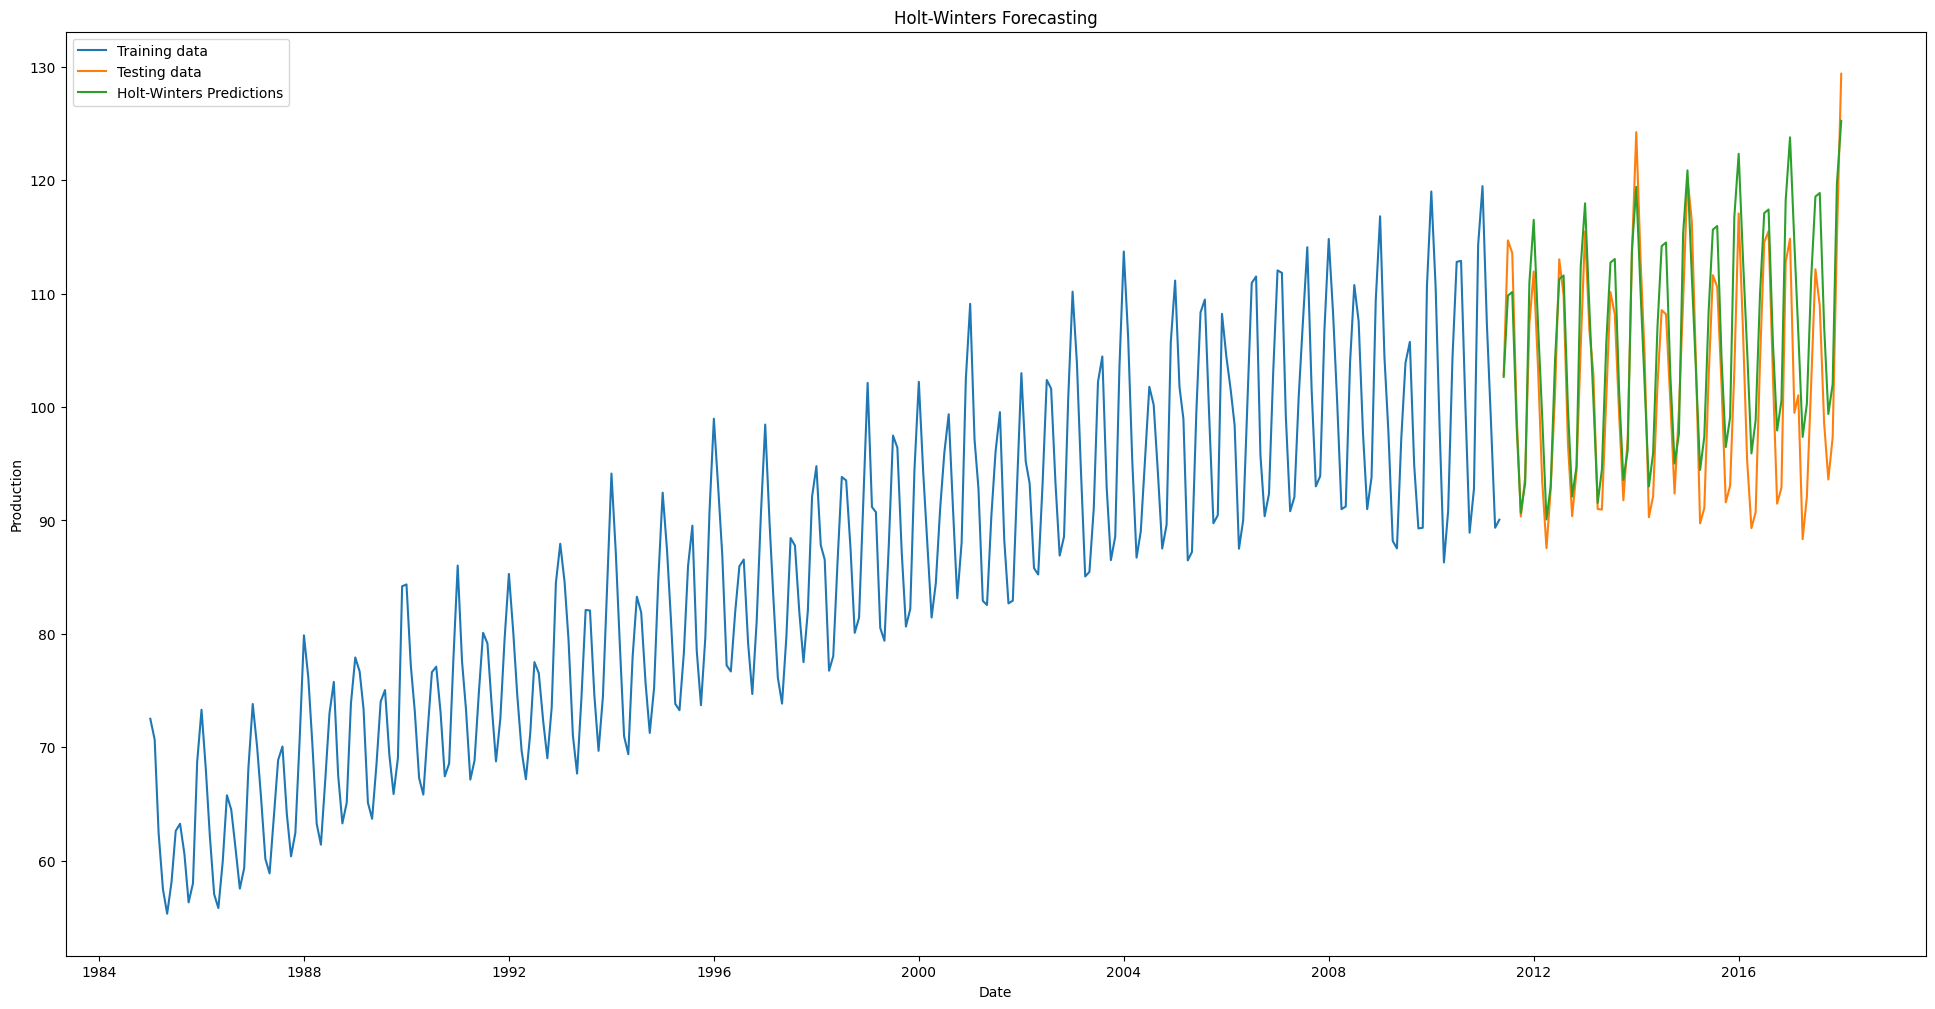

In [ ]:
# Plotting
plt.figure(figsize=(24, 12))
plt.plot(train_data.index, train_data['production'], label='Training data')
plt.plot(test_data.index, test_data['production'], label='Testing data')
plt.plot(test_data.index, predictions, label='Holt-Winters Predictions')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data['production'], predictions))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 5.308254633420742


In [ ]:
forecast = model_fit.forecast(steps=60)

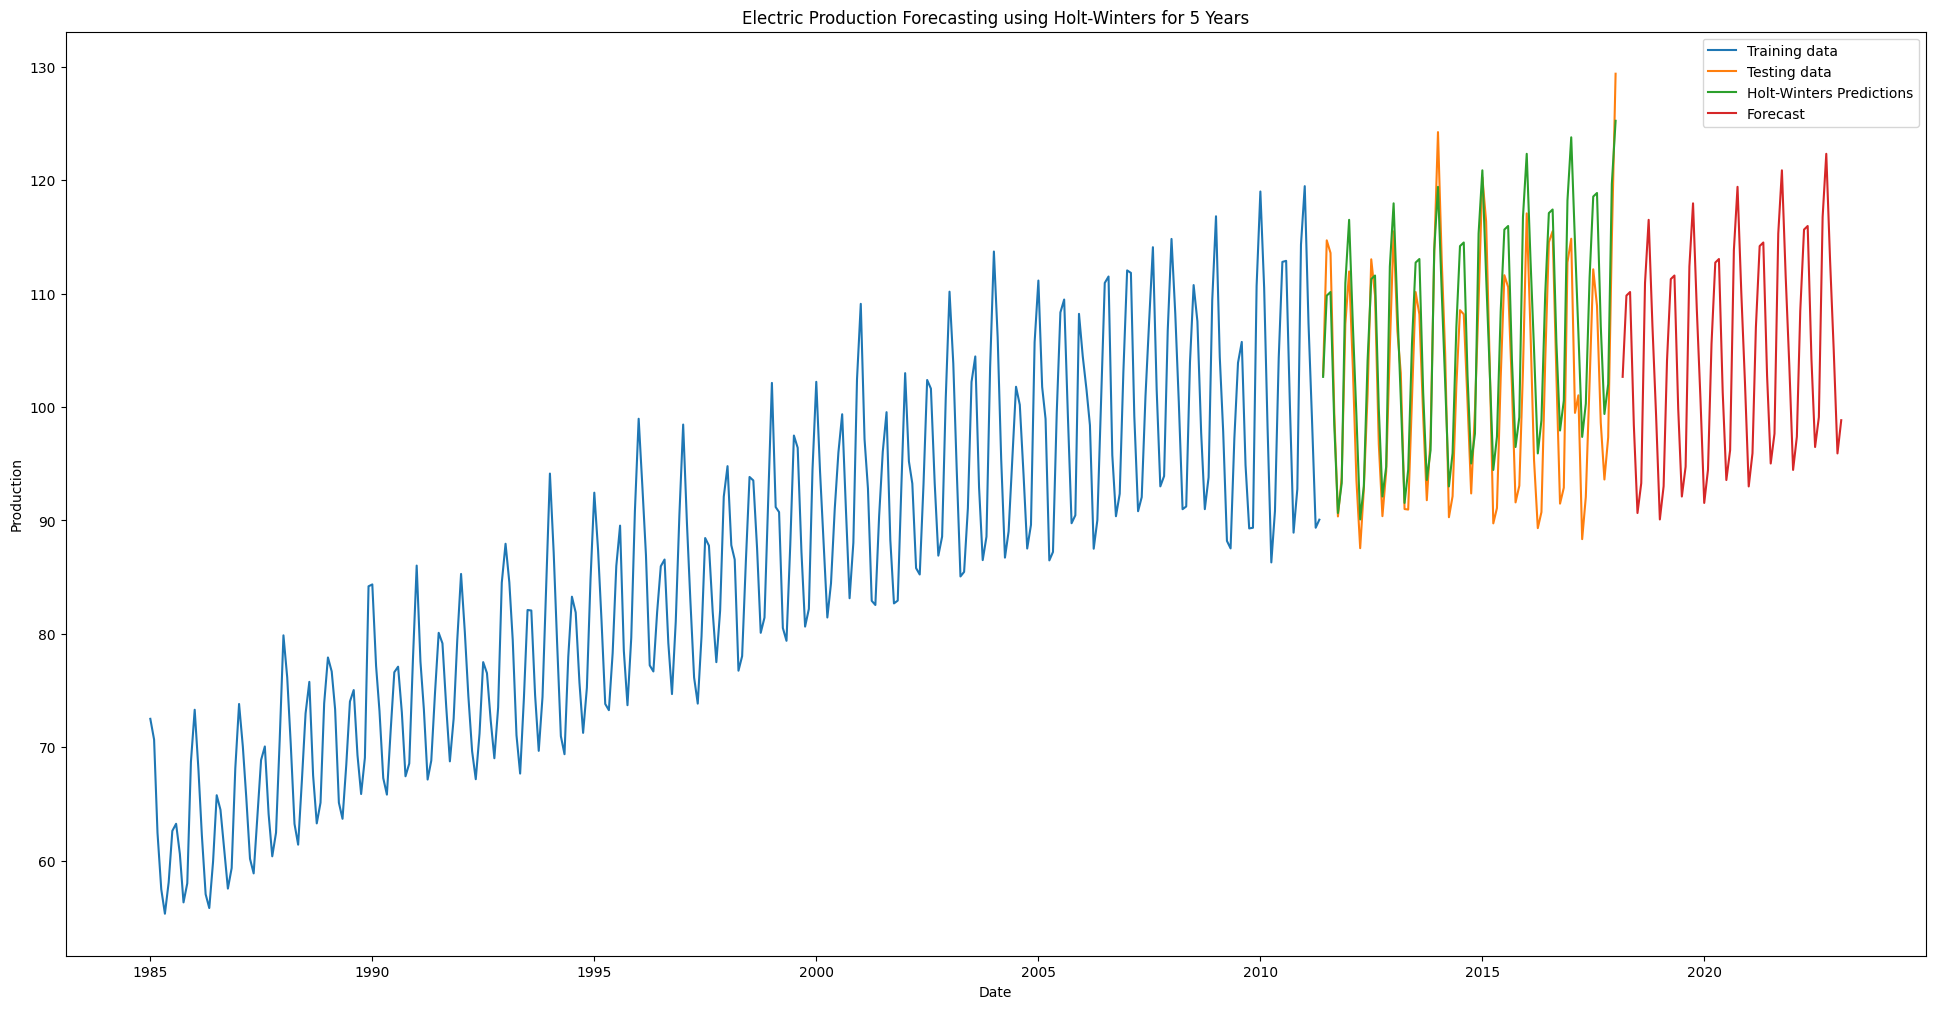

In [ ]:
# Plotting
plt.figure(figsize=(24, 12))
plt.plot(train_data.index, train_data['production'], label='Training data')
plt.plot(test_data.index, test_data['production'], label='Testing data')
plt.plot(test_data.index, predictions, label='Holt-Winters Predictions')
plt.plot(pd.date_range(start=test_data.index[-1], periods=61, freq='M')[1:], forecast, label='Forecast')
plt.title('Electric Production Forecasting using Holt-Winters for 5 Years')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

# **RMSE for Holt Winters is 5.31**

# Test for stationarity

In [ ]:
def test_stationarity(ts):

    adf_test = adfuller(ts)
    p_value = adf_test[1]

    print(f"ADF Stataics: {adf_test[0]:.3f}")
    print(f"p-value: {adf_test[1]:}")

    print()
    if p_value > 0.05:
        print('Fail to reject the null hypothesis, data is not stationary.')
    else:
        print('Reject the null hypothesis, data is stationary.')

test_stationarity(df['production'])

ADF Stataics: -2.257
p-value: 0.1862146911658712

Fail to reject the null hypothesis, data is not stationary.


In [ ]:
differenced_data = df['production'].diff().dropna()

# Check stationarity after differencing
print("Checking stationarity after differencing:")
test_stationarity(differenced_data)

Checking stationarity after differencing:
ADF Stataics: -7.105
p-value: 4.0777865655394095e-10

Reject the null hypothesis, data is stationary.


**Original Data was not stationary so 1st order differencing was needed to make it stationary**

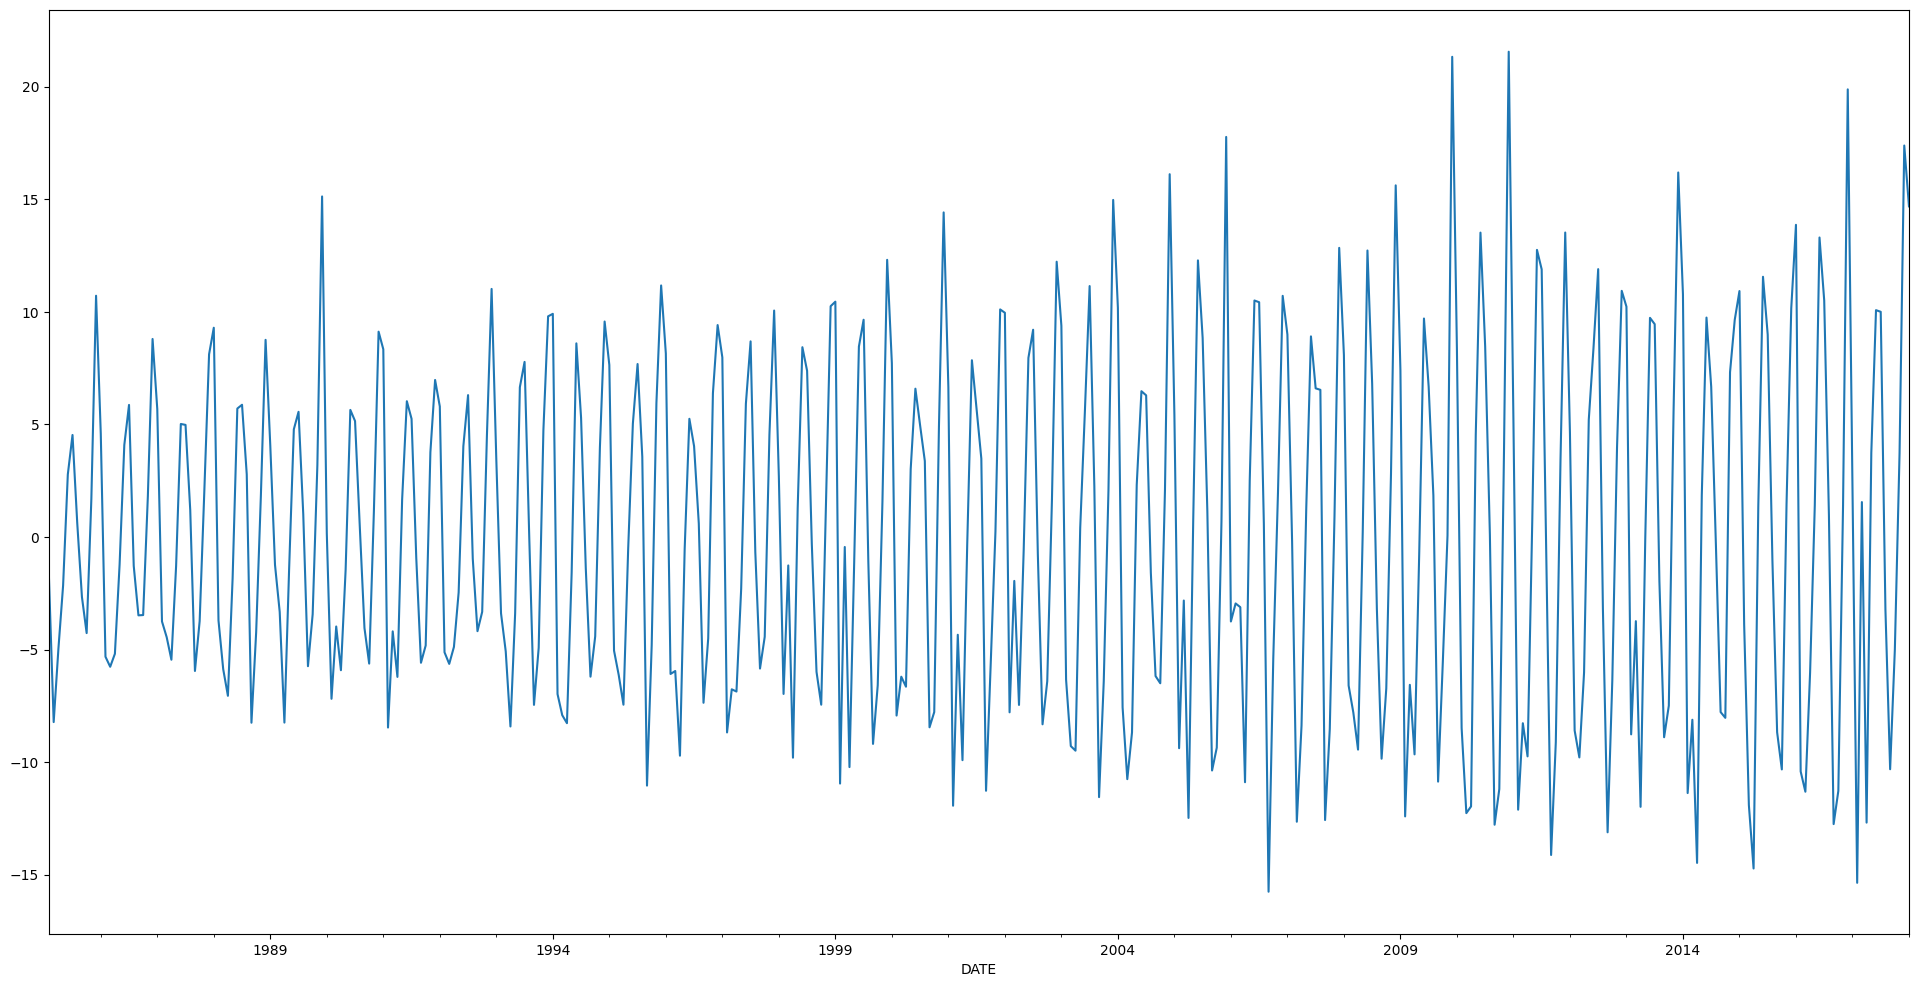

In [ ]:
plt.figure(figsize=(24, 12))
differenced_data.plot()
plt.show()

# ACF and PACF plots for Differneced Data

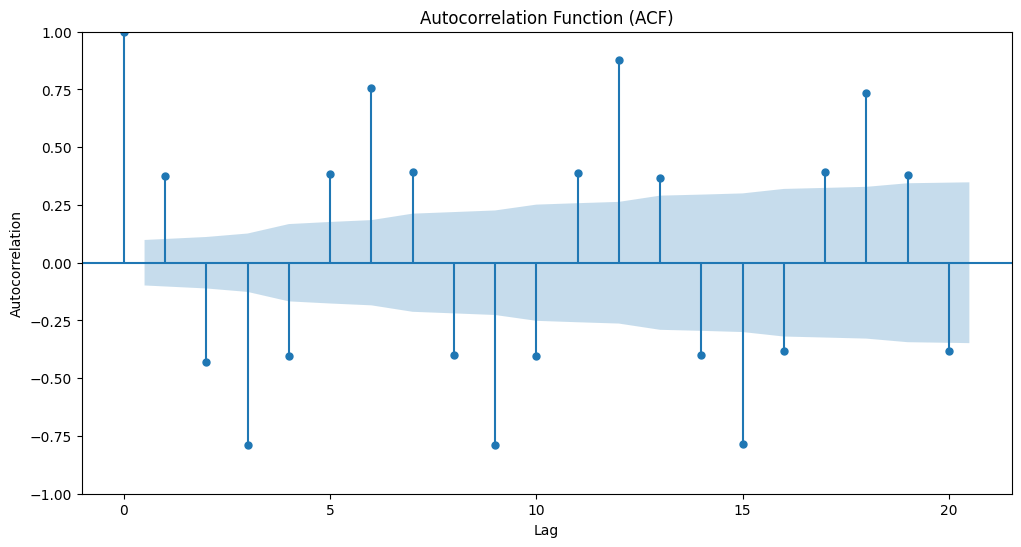

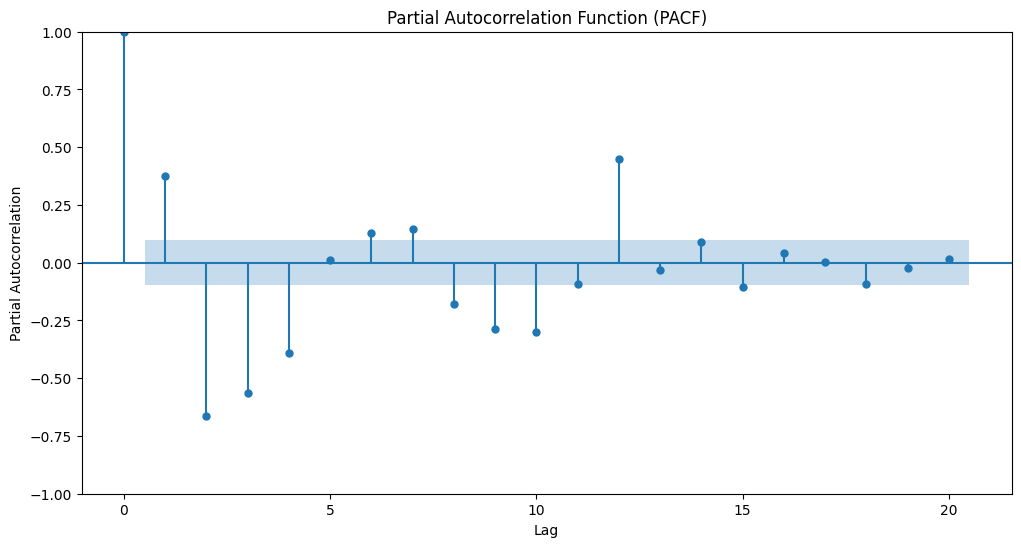

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(differenced_data, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


plt.figure(figsize=(12, 6))
plot_pacf(differenced_data, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Train and Test Split

In [ ]:
train_size_diff = int(len(differenced_data) * 0.8)
train_data_diff, test_data_diff = differenced_data.iloc[:train_size_diff], differenced_data.iloc[train_size_diff:]

# ARIMA

In [ ]:
p, d, q = 4, 1, 3
model_arima = ARIMA(train_data_diff, order=(p, d, q))
model_fit_arima = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model_fit_arima.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  316
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -822.133
Date:                Sat, 20 Apr 2024   AIC                           1660.267
Time:                        13:20:29   BIC                           1690.288
Sample:                    02-01-1985   HQIC                          1672.261
                         - 05-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7433      0.070     10.573      0.000       0.605       0.881
ar.L2         -1.0224      0.071    -14.462      0.000      -1.161      -0.884
ar.L3          0.0268      0.071      0.379      0.7

In [ ]:
predictions_arima = model_fit_arima.predict(start=test_data_diff.index[0], end=test_data_diff.index[-1])

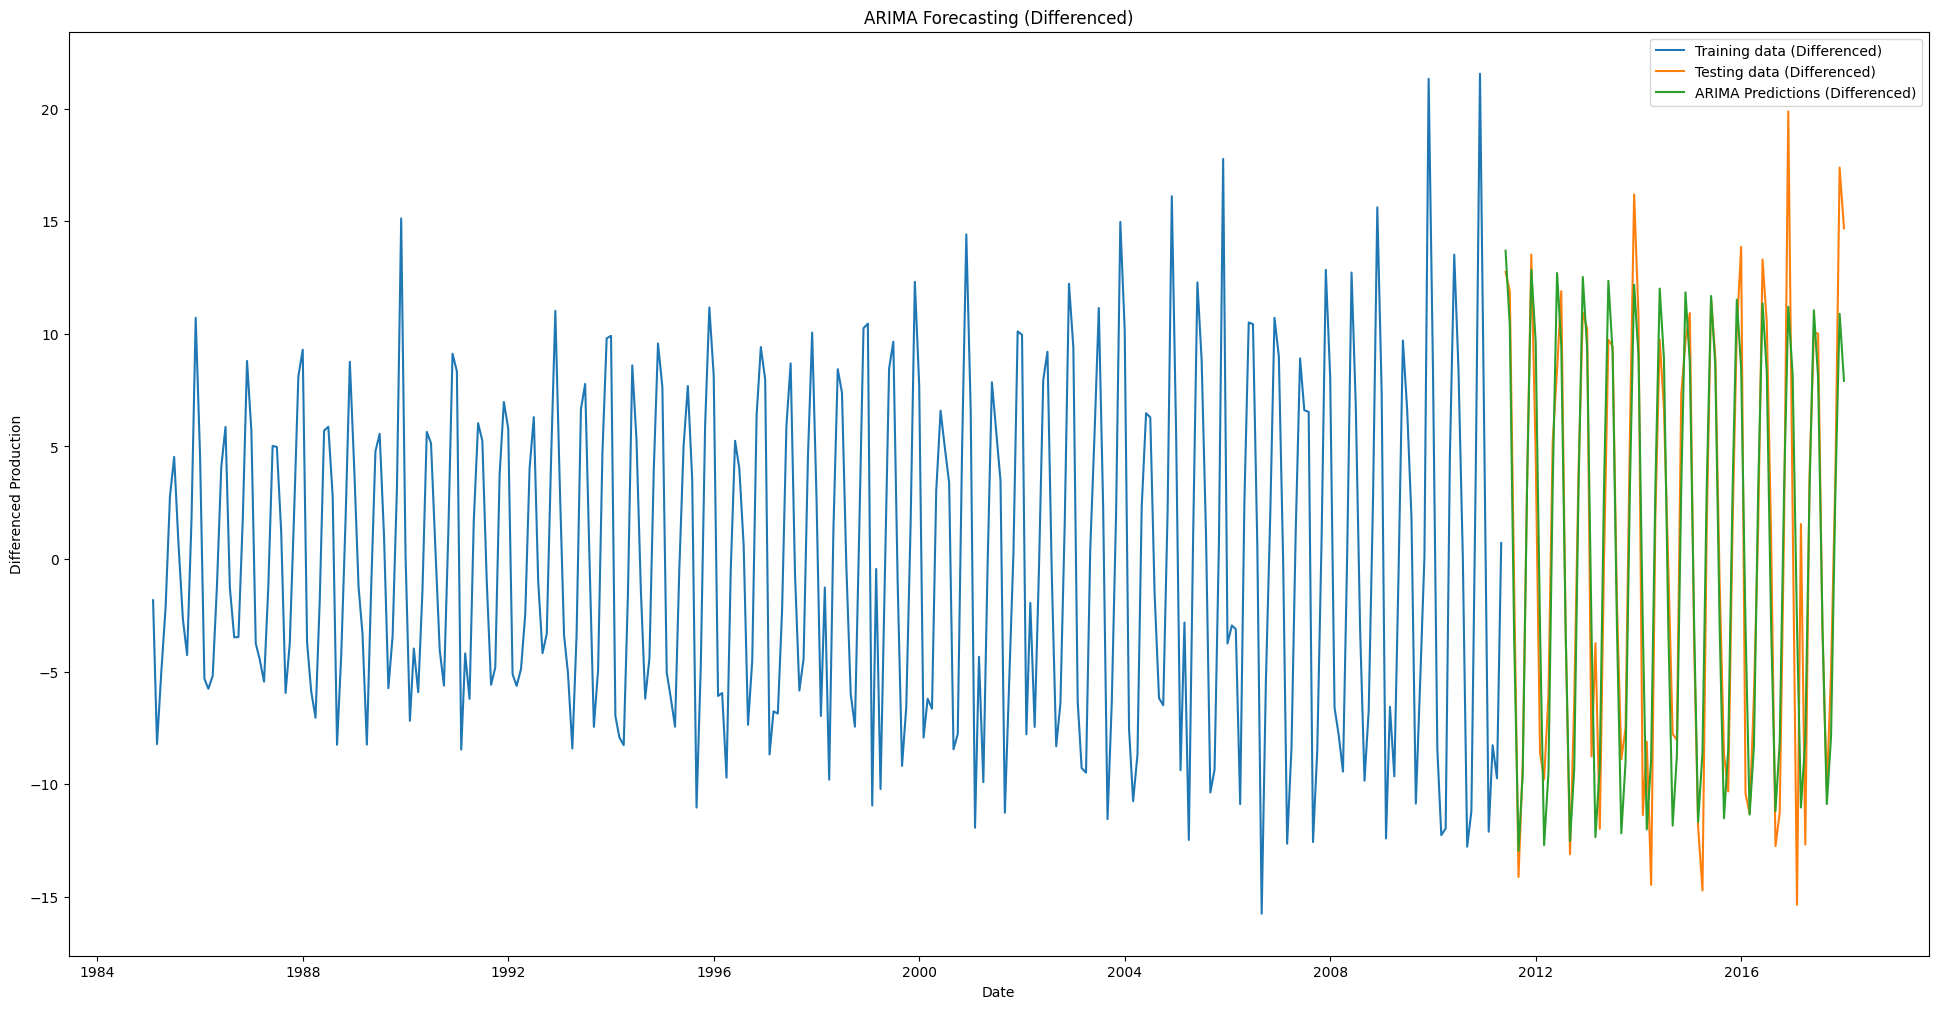

In [ ]:
plt.figure(figsize=(24, 12))
plt.plot(train_data_diff.index, train_data_diff, label='Training data (Differenced)')
plt.plot(test_data_diff.index, test_data_diff, label='Testing data (Differenced)')
plt.plot(predictions_arima.index, predictions_arima, label='ARIMA Predictions (Differenced)')
plt.title('ARIMA Forecasting (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Production')
plt.legend()
plt.show()

In [ ]:
rmse_arima = np.sqrt(mean_squared_error(test_data_diff, predictions_arima))
print("Root Mean Squared Error (RMSE) for ARIMA:", rmse_arima)

Root Mean Squared Error (RMSE) for ARIMA: 3.903728079604029


In [ ]:
forecast_arima = model_fit_arima.forecast(steps=60)

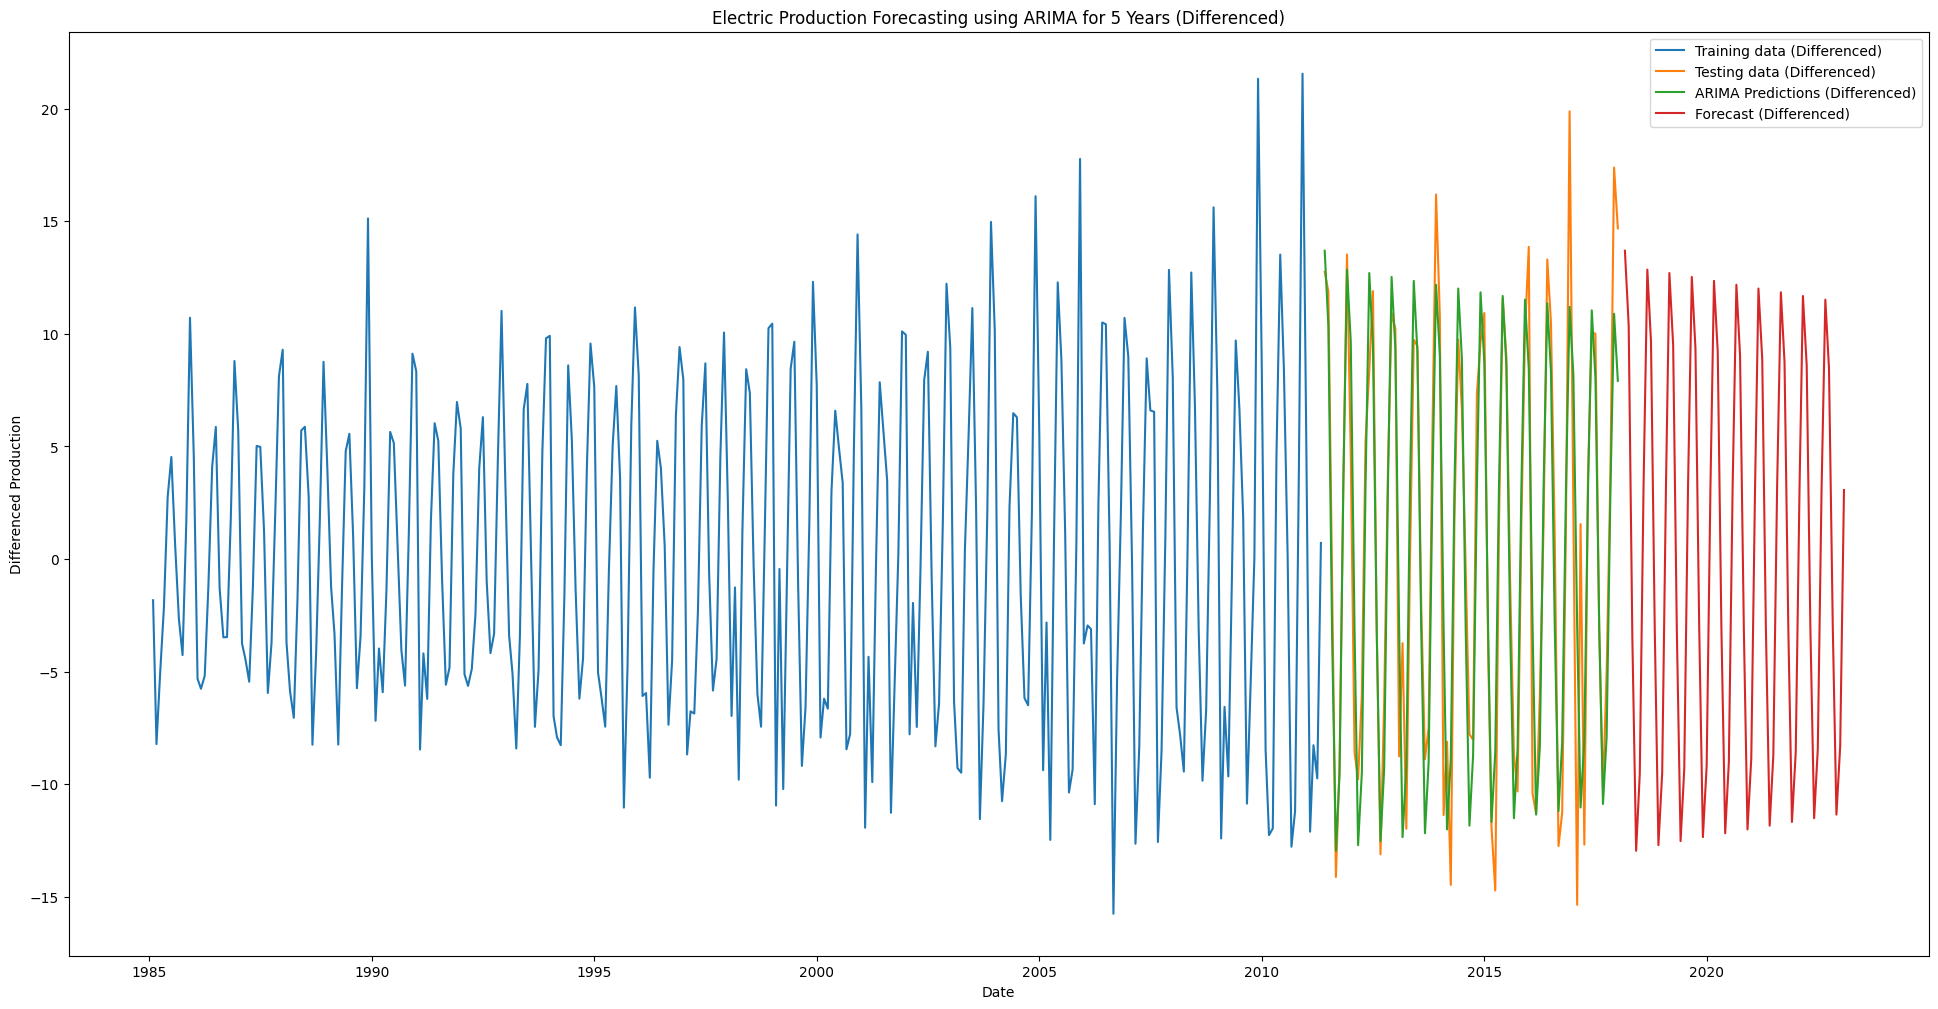

In [ ]:
plt.figure(figsize=(24, 12))
plt.plot(train_data_diff.index, train_data_diff, label='Training data (Differenced)')
plt.plot(test_data_diff.index, test_data_diff, label='Testing data (Differenced)')
plt.plot(predictions_arima.index, predictions_arima, label='ARIMA Predictions (Differenced)')
plt.plot(pd.date_range(start=test_data_diff.index[-1], periods=61, freq='M')[1:], forecast_arima, label='Forecast (Differenced)')
plt.title('Electric Production Forecasting using ARIMA for 5 Years (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Production')
plt.legend()
plt.show()

# **RMSE for ARIMA is 3.90**

# AUTO ARIMA

In [ ]:
model_autoarima = pm.auto_arima(train_data_diff, seasonal=True, m=12, suppress_warnings=True)

In [ ]:
print(model_autoarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  316
Model:             SARIMAX(1, 0, 3)x(0, 1, [1], 12)   Log Likelihood                -670.969
Date:                              Sat, 20 Apr 2024   AIC                           1355.938
Time:                                      13:42:40   BIC                           1381.958
Sample:                                  02-01-1985   HQIC                          1366.347
                                       - 05-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0017      0.002     -1.083      0.279      -0.005       0.001
ar.L1          0.69

Best order suggested was (1,1,3)(1,1,1,12)



# SARIMA

In [ ]:
order = (4, 1, 3)
seasonal_order = (1, 1, 1, 12)
model_sarima = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit_sarima = model_sarima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model_fit_sarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           production   No. Observations:                  317
Model:             SARIMAX(4, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -668.783
Date:                              Sat, 20 Apr 2024   AIC                           1357.566
Time:                                      13:22:45   BIC                           1394.736
Sample:                                  01-01-1985   HQIC                          1372.435
                                       - 05-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7781      0.069    -11.346      0.000      -0.913      -0.644
ar.L2         -0.28

In [ ]:
predictions_sarima = model_fit_sarima.predict(start=test_data.index[0], end=test_data_diff.index[-1])

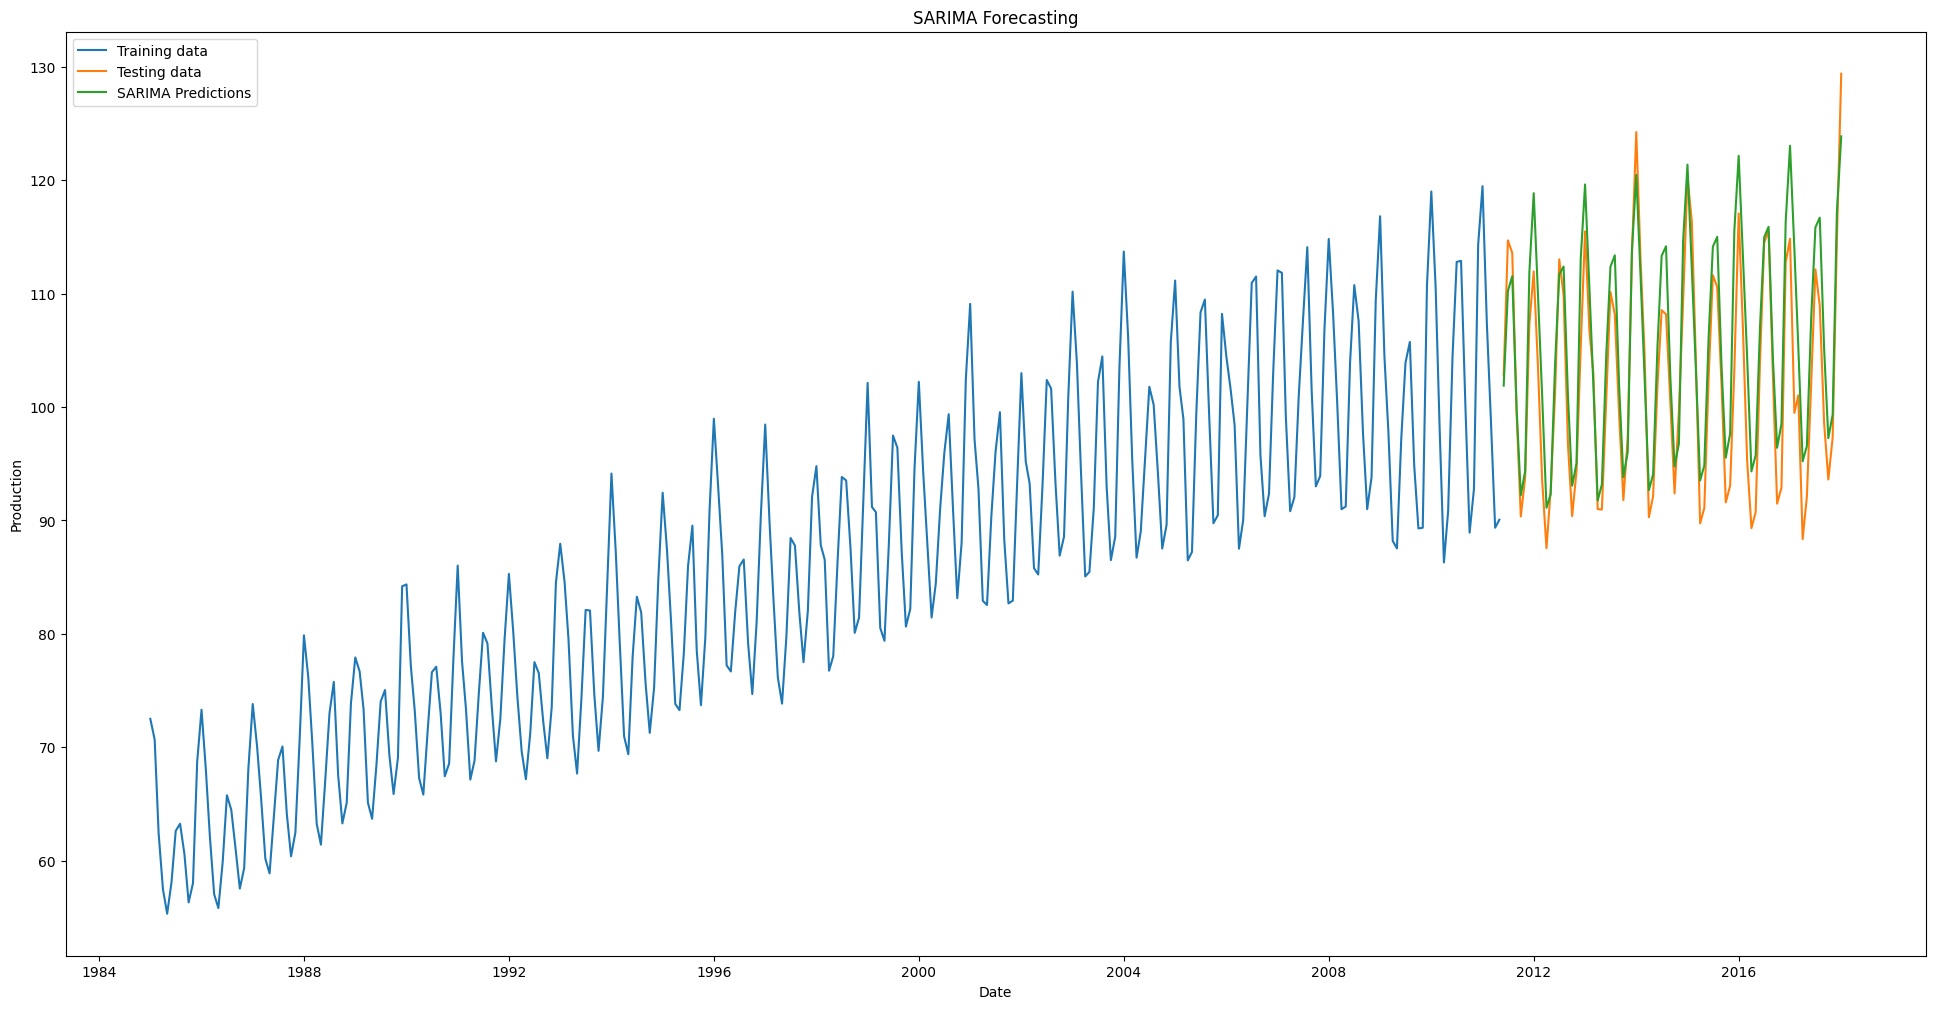

In [ ]:
plt.figure(figsize=(24, 12))
plt.plot(train_data.index, train_data, label='Training data')
plt.plot(test_data.index, test_data, label='Testing data')
plt.plot(predictions_sarima.index, predictions_sarima, label='SARIMA Predictions')
plt.title('SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

In [ ]:
rmse_sarima = np.sqrt(mean_squared_error(test_data, predictions_sarima))
print("Root Mean Squared Error (RMSE) for SARIMA:", rmse_sarima)

Root Mean Squared Error (RMSE) for SARIMA: 4.5788167134938265


In [ ]:
forecast_sarima = model_fit_sarima.forecast(steps=60)

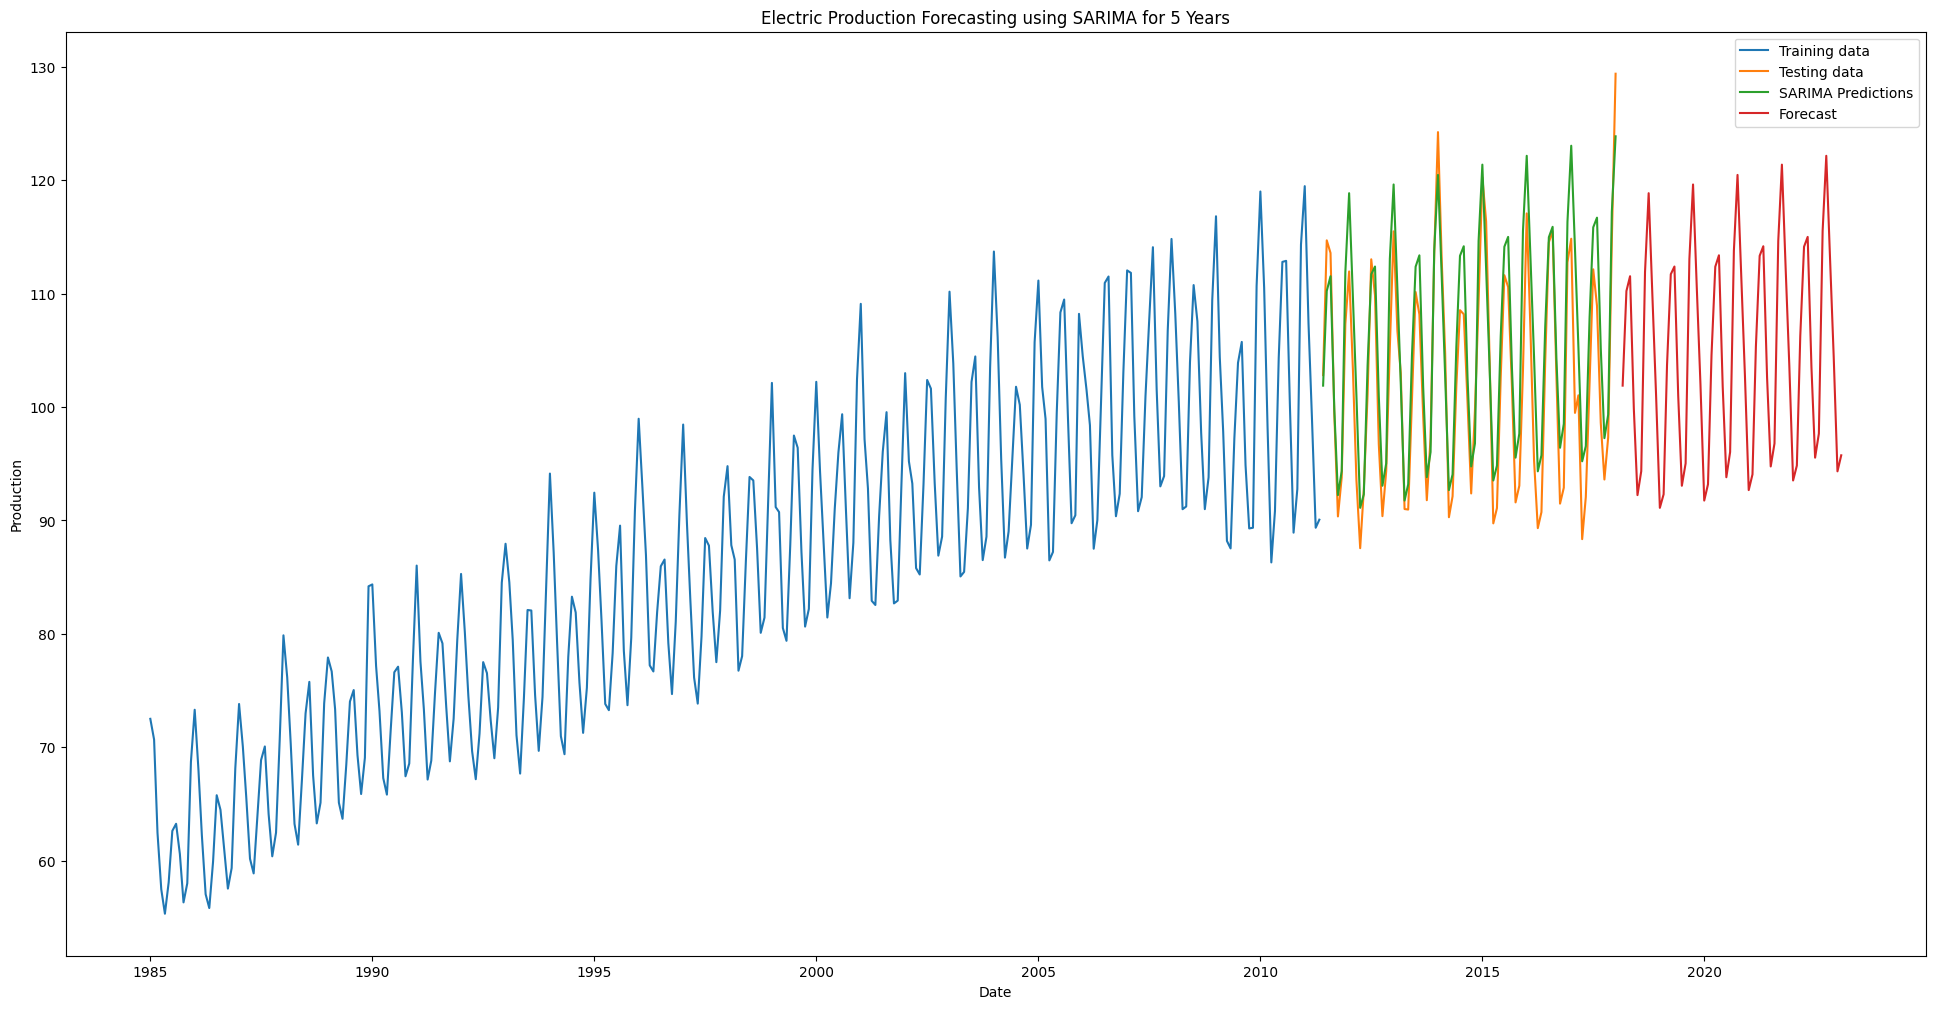

In [ ]:
plt.figure(figsize=(24, 12))
plt.plot(train_data.index, train_data, label='Training data')
plt.plot(test_data.index, test_data, label='Testing data')
plt.plot(predictions_sarima.index, predictions_sarima, label='SARIMA Predictions')
plt.plot(pd.date_range(start=test_data_diff.index[-1], periods=61, freq='M')[1:], forecast_sarima, label='Forecast')
plt.title('Electric Production Forecasting using SARIMA for 5 Years')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

# **RMSE for SARIMA is 4.59**

# Conclusion:

Based on the results obtained from different models, it can be concluded that **ARIMA** model is the best fit for forecasting future electric production. The ARIMA model exhibited the lowest RMSE value of 3.90 compared to Holt Winters (5.31) and SARIMA (4.59). This suggests that the ARIMA model can provide more accurate predictions of future electric production compared to the other models.

However, it is important to note that the choice of the best model may vary depending on the specific characteristics of the data and the desired accuracy of the predictions. It is recommended to further evaluate the performance of the models using different metrics and to conduct sensitivity analysis to assess the impact of different parameters on the model performance.